<a href="https://colab.research.google.com/github/TommasoG85/GraphSearchComparison/blob/main/Herbary_0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrice Piante:
            Fuoco  Terra  Aria  Acqua    Blend
Fucus           3      2     2      1  #c59460
Allium          2      3     1      1  #c9a84b
Euphorbia       1      2     2      3  #8bc896
Coriandrum      3      4     4      1  #c9b36b

Matrice Malattie:
                Fuoco  Terra  Aria  Acqua    Blend
Hysterica           1      3     4      4  #d38fc2
Ulceratio           4      2     1      3  #637fa6
Quartana            4      3     4      4  #8a82aa
Situs inversus      2      1     4      3  #b991a1

Matrice di Similarità:
            Hysterica  Ulceratio  Quartana  Situs inversus
Fucus        0.178447   0.596319  0.209299        0.268243
Allium       0.175560   0.492911  0.171491        0.200126
Euphorbia    0.353217   0.521690  0.268168        0.297565
Coriandrum   0.236975   0.569140  0.341541        0.541449
Autovalore di Perron-Frobenius per la matrice delle piante: 8.389572636993343
Autovettore associato per la matrice delle piante: [0.44234536 0.37581333 0.49

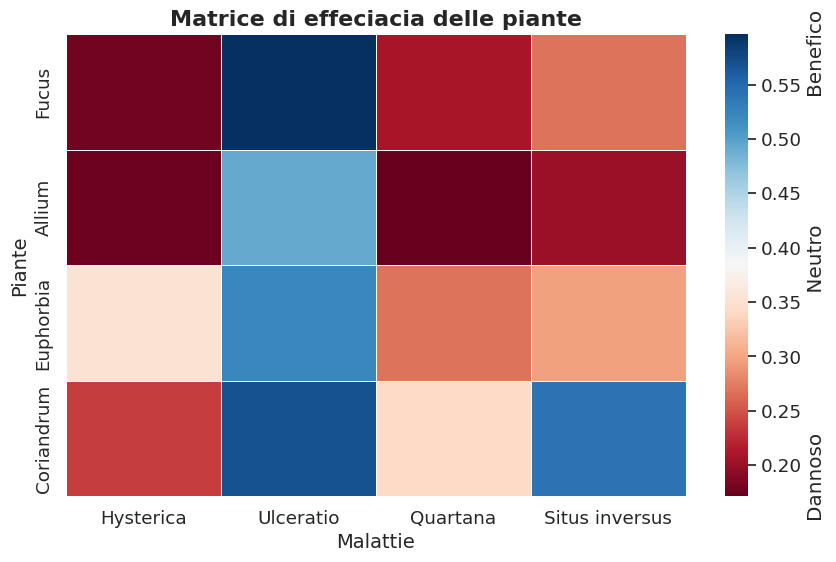

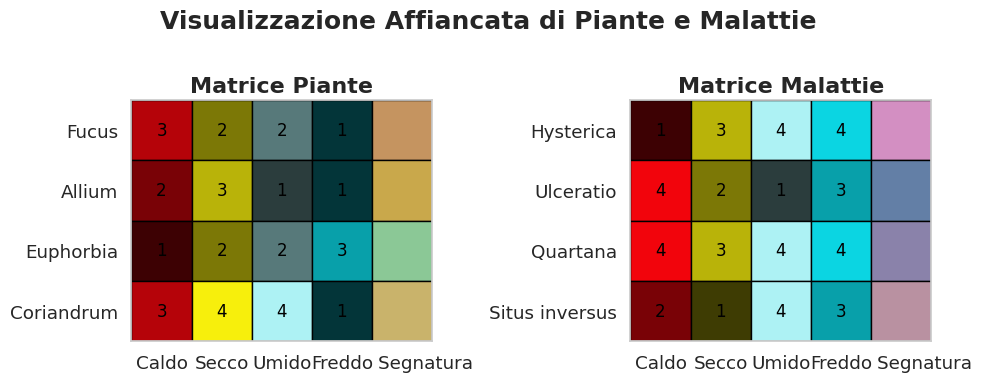


--- Recommendations for Choler Body Type ---
Healthy body vector: [3, 2, 2, 2]
Disease vector (non-negative): [1, 3, 4, 4]
Disease effect: 5
Modified body vector after applying disease effect: [2.5, 1, 1, 1]
For Hysterica, the best plant is: Euphorbia with plant effect: 0.4
Healthy body vector: [3, 2, 2, 2]
Disease vector (non-negative): [4, 2, 1, 3]
Disease effect: 5
Modified body vector after applying disease effect: [1.0, 1.0, 1.5, 1]
For Ulceratio, the best plant is: Fucus with plant effect: 0.6
Healthy body vector: [3, 2, 2, 2]
Disease vector (non-negative): [4, 3, 4, 4]
Disease effect: 5
Modified body vector after applying disease effect: [1.0, 1, 1, 1]
For Quartana, the best plant is: Fucus with plant effect: 0.6
Healthy body vector: [3, 2, 2, 2]
Disease vector (non-negative): [2, 1, 4, 3]
Disease effect: 5
Modified body vector after applying disease effect: [2.0, 1.5, 1, 1]
For Situs inversus, the best plant is: Fucus with plant effect: 0.4

--- Recommendations for Melancholic

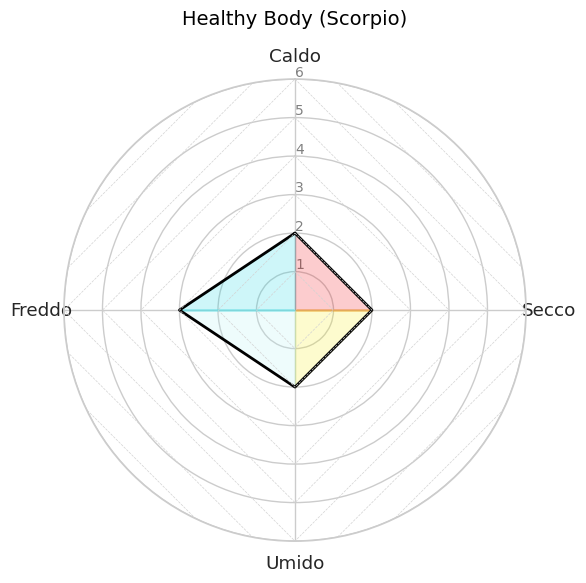

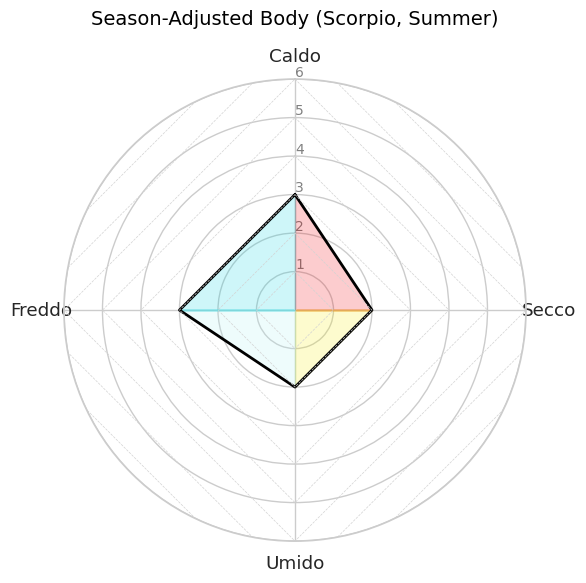

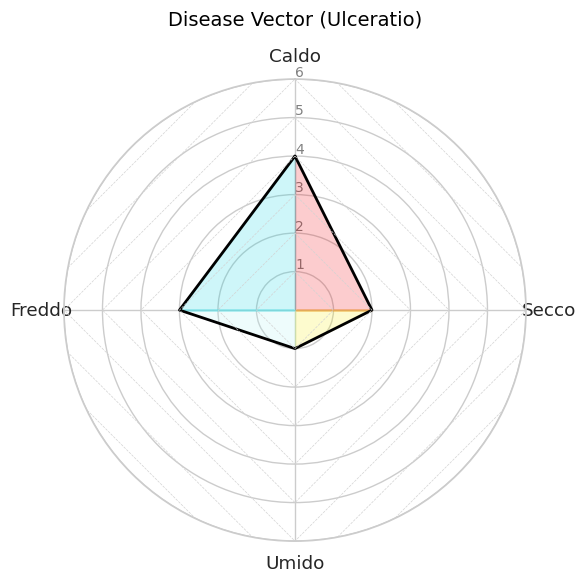

Healthy body vector: [3, 2, 2, 3]
Disease vector (non-negative): [4, 2, 1, 3]
Disease effect: 5
Modified body vector after applying disease effect: [1.0, 1.0, 1.5, 1.5]


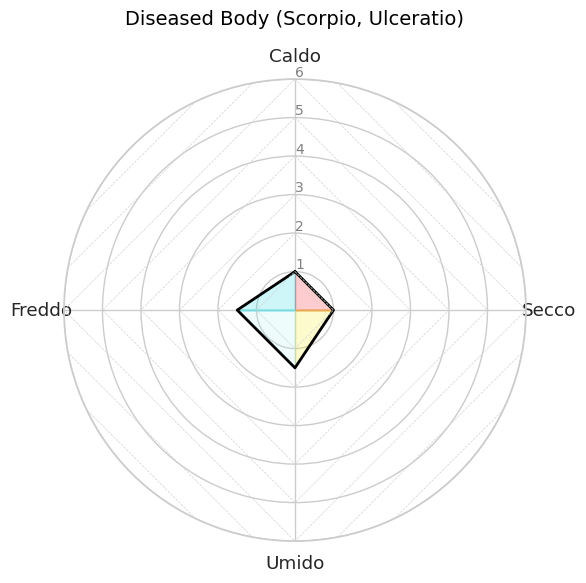

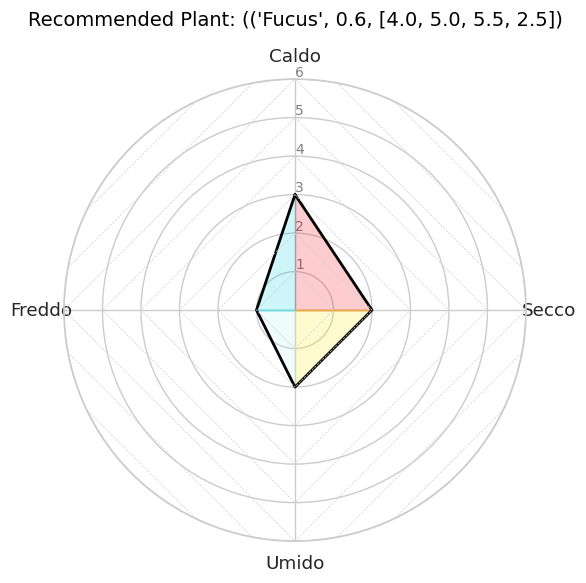


Matrice Corpo Curato:
              Fuoco  Terra  Aria  Acqua
Corpo Curato    2.2    1.8     1      1


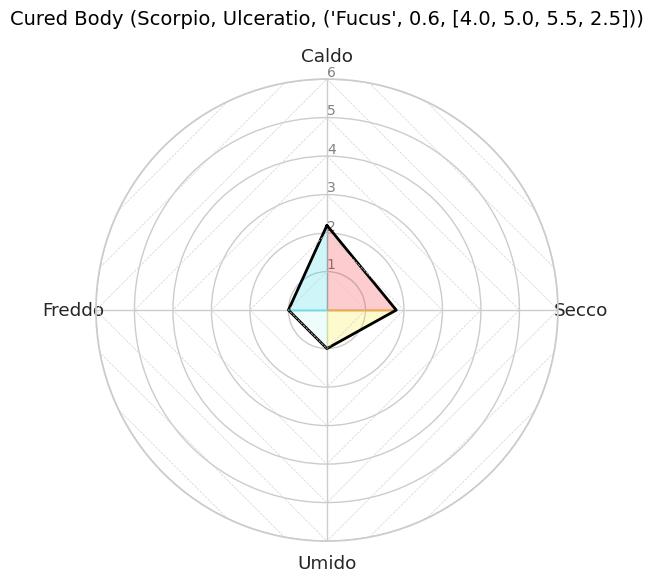

Healthy body vector: [5, 2, 2, 3]
Disease vector (non-negative): [1, 3, 4, 4]
Disease effect: 5
Modified body vector after applying disease effect: [4.5, 1, 1, 1.0]

For a Sagittarius with Hysterica in Winter, the recommended plant is: ('Euphorbia', 0.6, [7.5, 5.0, 5.0, 2.0])


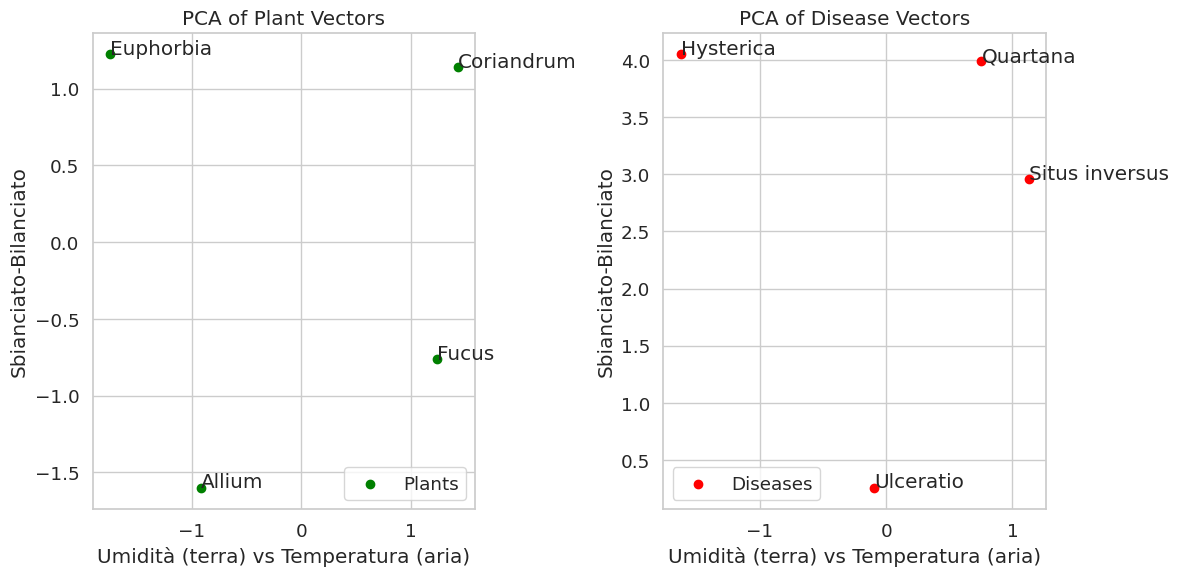

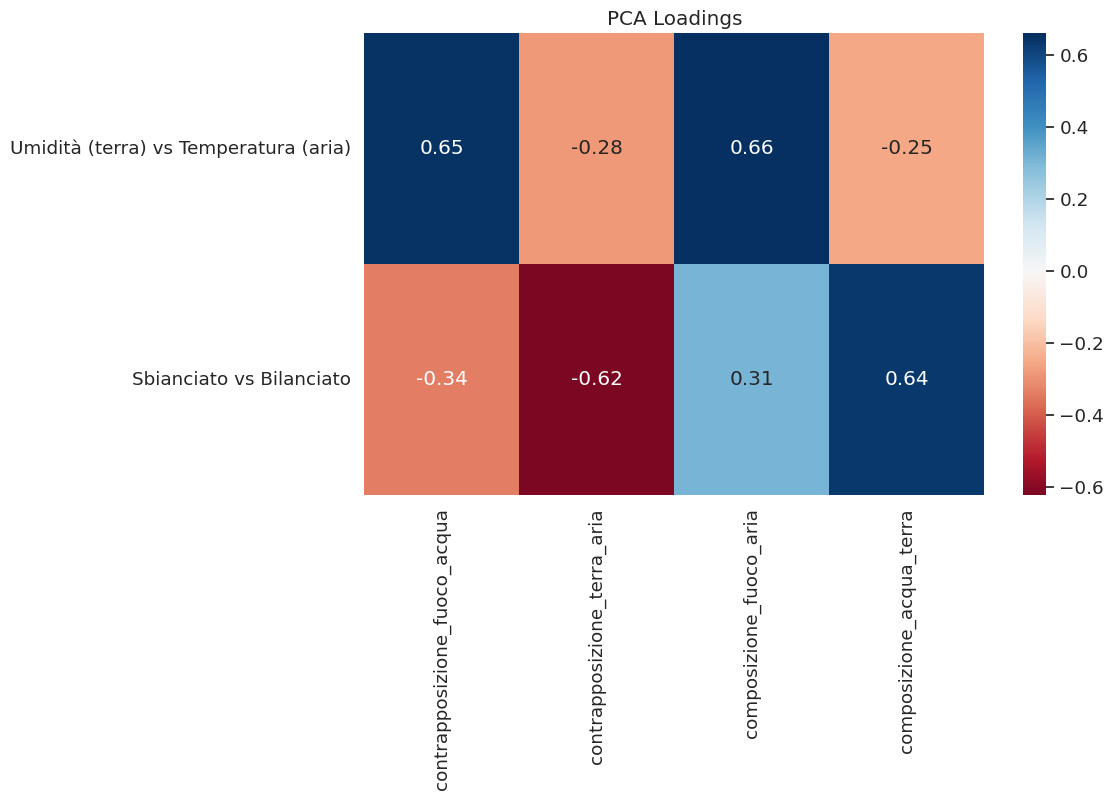

In [57]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
import matplotlib.colors as mcolors
from scipy.spatial.distance import euclidean
from scipy.linalg import eig
import networkx as nx
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Define lists of 50 plants and 50 diseases
piante_100 = ['Aconitum', 'Artemisia', 'Belladonna', 'Calendula', 'Chamomilla', 'Hypericum', 'Lavandula', 'Melissa', 'Myrrha', 'Myrtus', 'Nicotiana', 'Plantago', 'Rosa', 'Salvia', 'Thymus', 'Satureja', 'Aloe', 'Centaurea', 'Corylus', 'Crataegus', 'Datura', 'Fucus', 'Gentiana', 'Iris', 'Juglans', 'Mentha', 'Papaver', 'Perovskia', 'Rheum', 'Rubus', 'Senecio', 'Symphytum', 'Tanacetum', 'Urtica', 'Valeriana', 'Viscum', 'Zea', 'Sambucus', 'Vinca', 'Cichorium', 'Foeniculum', 'Coriandrum', 'Allium', 'Ferula', 'Buxus', 'Euphorbia', 'Chrysanthemum', 'Ligustrum', 'Ricinus', 'Silybum']
malattie_100 = ['Pestis', 'Morbus Gallicus', 'Lues', 'Febris', 'Cacochymia', 'Scabies', 'Pneumonia', 'Malaria', 'Tertiana', 'Quartana', 'Dysenteria', 'Cholera', 'Variola', 'Rubeola', 'Tubercolosis', 'Sphacelus', 'Ulceratio', 'Cataracta', 'Morbilli', 'Siccus', 'Epilepsia', 'Paralysis', 'Cacochymia', 'Lepra', 'Asphyxia', 'Ictus', 'Plica', 'Furunculus', 'Tinea', 'Situs inversus', 'Ophthalmia', 'Tetanus', 'Sordes', 'Causus', 'Furor', 'Morsus', 'Trachoma', 'Sphacelus', 'Lymphadenitis', 'Meningitis', 'Anemia', 'Hectica', 'Gouta', 'Malum', 'Fasciculus', 'Aconitismus', 'Pellagra', 'Fistula', 'Melancholia', 'Hysterica']

# Randomly select 4 plants and 4 diseases
piante = random.sample(piante_100, 4)
malattie = random.sample(malattie_100, 4)

# ... (Rest of your existing code) ...

# Define elements and their colors
elementi = ['Fuoco', 'Terra', 'Aria', 'Acqua']
colori_elementi = {
    'Fuoco': 'f2040c',   # Red
    'Terra': 'f7ef0c',   # Brown
    'Aria': 'adf2f4',    # Light Blue
    'Acqua': '0bd5e2'    # Blue
}

# Function to convert hexadecimal color to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return r / 255.0, g / 255.0, b / 255.0

def get_complementary_color(hex_color):
    r, g, b = hex_to_rgb(hex_color)
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    complementary_h = (h + 0.5) % 1.0
    complementary_r, complementary_g, complementary_b = colorsys.hsv_to_rgb(complementary_h, s, v)
    return '#%02x%02x%02x' % tuple(int(c * 255) for c in (complementary_r, complementary_g, complementary_b))

def get_element_weight(elemento):
    return 1.0  # All elements have weight 1.0

def genera_matrice(elementi, nomi, inverti_colori=False):
    matrice = np.random.randint(1, 5, size=(len(nomi), len(elementi)))
    blend_colori = []
    for riga in matrice:
        colore_blend_rgb = [0, 0, 0]
        total_weight = 0
        for i, elemento in enumerate(elementi):
            colore_elemento_rgb = hex_to_rgb(colori_elementi[elemento])
            weight = riga[i] * get_element_weight(elemento)
            colore_blend_rgb = [colore_blend_rgb[j] + colore_elemento_rgb[j] * weight for j in range(3)]
            total_weight += weight
        colore_blend_rgb = [c / total_weight for c in colore_blend_rgb]
        colore_finale_hex = '#%02x%02x%02x' % tuple(int(c * 255) for c in colore_blend_rgb)
        if inverti_colori:
            colore_finale_hex = get_complementary_color(colore_finale_hex)
        blend_colori.append(colore_finale_hex)
    return pd.DataFrame(matrice, index=nomi, columns=elementi).assign(Blend=blend_colori)

# Generate matrices for plants and diseases
matrice_piante = genera_matrice(elementi, piante)
matrice_malattie = genera_matrice(elementi, malattie, inverti_colori=True)

# Modify colors of the disease matrix for inversion
def inverti_colore(colore):
    colore_invertito = ''.join([f'{255 - int(colore[i:i+2], 16):02X}' for i in (1, 3, 5)])
    return f'#{colore_invertito}'

def crea_vettore_unico_pca(riga):
    """Creates a unique vector using PCA based on opposition and composition."""
    fuoco = riga['Fuoco']
    terra = riga['Terra']
    aria = riga['Aria']
    acqua = riga['Acqua']

    # Opposition features
    contrapposizione_fuoco_acqua = (fuoco - acqua)
    contrapposizione_terra_aria = (terra - aria)

    # Composition features
    composizione_fuoco_aria = (fuoco + aria)
    composizione_acqua_terra = (acqua + terra)

    # Create the feature vector
    vettore = [contrapposizione_fuoco_acqua, contrapposizione_terra_aria, composizione_fuoco_aria, composizione_acqua_terra]
    return vettore

def similarita_coseno_invertita_modificata_pca(matrice_piante, matrice_malattie):
    """Calculates similarity using PCA and Euclidean distance."""
    global vettori_piante, vettori_malattie  # Declare as global to modify them within the function

    # 1. Create feature vectors
    vettori_piante = matrice_piante.apply(crea_vettore_unico_pca, axis=1).values.tolist()
    vettori_malattie = matrice_malattie.apply(crea_vettore_unico_pca, axis=1).values.tolist()

    # 2. Standardize features
    scaler = StandardScaler()
    vettori_piante_scaled = scaler.fit_transform(vettori_piante)
    vettori_malattie_scaled = scaler.transform(vettori_malattie)

    # 3. Apply PCA
    pca = PCA(n_components=2)  # Reduce to 2 principal components
    vettori_piante_pca = pca.fit_transform(vettori_piante_scaled)
    vettori_malattie_pca = pca.transform(vettori_malattie_scaled)


    loadings = pca.components_
    loadings_df = pd.DataFrame(loadings,
                           columns=['contrapposizione_fuoco_acqua', 'contrapposizione_terra_aria',
                                    'composizione_fuoco_aria', 'composizione_acqua_terra'],
                           index=['PC1', 'PC2'])


    # 4. Calculate Euclidean distance
    matrice_similarita = [[euclidean(v1, v2) for v2 in vettori_malattie_pca] for v1 in vettori_piante_pca]
    matrice_similarita = [[1/d if d != 0 else float('inf') for d in row] for row in matrice_similarita]
    return matrice_similarita

# Calculate similarity matrix using PCA
matrice_similarita = similarita_coseno_invertita_modificata_pca(matrice_piante, matrice_malattie)
df_similarita = pd.DataFrame(matrice_similarita, index=piante, columns=malattie)

# Show matrices
print("Matrice Piante:")
print(matrice_piante)
print("\nMatrice Malattie:")
print(matrice_malattie)
print("\nMatrice di Similarità:")
print(df_similarita)


def calcola_perron_frobenius(matrice):
    # Assicurati che la matrice sia non negativa
    matrice_non_negativa = np.maximum(matrice.values, 0)

    # Calcola gli autovalori e gli autovettori
    autovalori, autovettori = eig(matrice_non_negativa)

    # Trova l'autovalore dominante (Perron-Frobenius)
    autovalore_perron = max(autovalori, key=lambda x: np.abs(x))
    autovettore_associato = autovettori[:, np.argmax(np.abs(autovalori))]

    return autovalore_perron.real, autovettore_associato.real

# Calcolo dell'autovalore di Perron-Frobenius per la matrice delle piante e delle malattie
autovalore_piante, autovettore_piante = calcola_perron_frobenius(matrice_piante.iloc[:, :-1])
autovalore_malattie, autovettore_malattie = calcola_perron_frobenius(matrice_malattie.iloc[:, :-1])

# Visualizzazione dei risultati
print(f"Autovalore di Perron-Frobenius per la matrice delle piante: {autovalore_piante}")
print(f"Autovettore associato per la matrice delle piante: {autovettore_piante}")
print(f"Autovalore di Perron-Frobenius per la matrice delle malattie: {autovalore_malattie}")
print(f"Autovettore associato per la matrice delle malattie: {autovettore_malattie}")

def valuta_efficacia_relativa(autovalore_piante, autovalore_malattie):
    if autovalore_piante > autovalore_malattie:
        print("Le piante hanno un'efficacia complessiva maggiore rispetto all'impatto delle malattie.")
    else:
        print("Le malattie hanno un impatto complessivo più dominante rispetto all'efficacia delle piante.")

def identifica_piante_con_impatto_maggiore(autovettore_piante, piante):
    # Ordina le piante in base ai valori dell'autovettore associato
    ordine_importanza = sorted(zip(piante, autovettore_piante), key=lambda x: x[1], reverse=True)
    print("Piante con maggiore impatto, in ordine decrescente:")
    for pianta, valore in ordine_importanza:
        print(f"{pianta}: {valore:.2f}")

def esamina_vulnerabilita_malattie(autovettore_malattie, malattie):
    # Ordina le malattie in base ai valori dell'autovettore associato
    ordine_importanza = sorted(zip(malattie, autovettore_malattie), key=lambda x: x[1], reverse=True)
    print("Malattie più critiche, in ordine decrescente:")
    for malattia, valore in ordine_importanza:
        print(f"{malattia}: {valore:.2f}")

# Esecuzione delle funzioni per analisi
valuta_efficacia_relativa(autovalore_piante, autovalore_malattie)
identifica_piante_con_impatto_maggiore(autovettore_piante, piante)
esamina_vulnerabilita_malattie(autovettore_malattie, malattie)

# Set up Seaborn aesthetics
sns.set_palette("Set1")
plt.rcParams.update({'font.size': 12})  # Base font size
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Function to create a color map based on intensity
def crea_mappa_colori(matrice, colori_elementi):
    mappa_colori = np.zeros((matrice.shape[0], matrice.shape[1], 3), dtype=float)
    for i, elemento in enumerate(elementi):
        base_colore = np.array([
            int(colori_elementi[elemento][1:3], 16),
            int(colori_elementi[elemento][3:5], 16),
            int(colori_elementi[elemento][5:7], 16)
        ]) / 255.0
        intensità = matrice[elemento].values / 4
        for j in range(matrice.shape[0]):
            mappa_colori[j, i, :] = base_colore * intensità[j]
    return mappa_colori

# Visualize the similarity matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_similarita, annot=False, fmt=".0f", cmap='RdBu',  # Use a color palette
            cbar_kws={'label': 'Dannoso                      Neutro                    Benefico'}, linewidths=0.5)

plt.title('Matrice di effeciacia delle piante', fontsize=16, fontweight='bold')
plt.xlabel('Malattie', fontsize=14)
plt.ylabel('Piante', fontsize=14)
plt.show()

display_labels = {
    'Fuoco': 'Caldo',
    'Terra': 'Secco',
    'Aria': 'Umido',
    'Acqua': 'Freddo'
}

def visualizza_matrice_con_colori(matrice, titolo):
    num_righe = matrice.shape[0]
    num_colonne = matrice.shape[1] - 1  # Exclude "Blend" column

    # Rename columns before plotting
    matrice = matrice.rename(columns=display_labels)

    fig, ax = plt.subplots(figsize=(num_colonne + 1, num_righe))
    ax.set_aspect("equal")

    for i in range(num_righe):
        for j in range(num_colonne):
            intensita = matrice.iloc[i, j] / 4
            colore_elemento = colori_elementi[list(display_labels.keys())[list(display_labels.values()).index(matrice.columns[j])]]

            if colore_elemento.startswith("#"):
                colore_elemento = colore_elemento[1:]

            colore_rgb = mcolors.to_rgb('#' + colore_elemento)
            colore_finale = tuple(c * intensita for c in colore_rgb)

            rect = plt.Rectangle((j, num_righe - 1 - i), 1, 1, facecolor=colore_finale, edgecolor='black')
            ax.add_patch(rect)

            ax.text(j + 0.5, num_righe - 1 - i + 0.5, str(matrice.iloc[i, j]),
                    ha='center', va='center', color='black', fontsize=12)

        rect = plt.Rectangle((num_colonne, num_righe - 1 - i), 1, 1, facecolor=matrice.iloc[i, -1], edgecolor='black')
        ax.add_patch(rect)

    ax.set_xlim(0, num_colonne + 1)
    ax.set_ylim(0, num_righe)
    ax.set_xticks(np.arange(num_colonne + 1) + 0.5)
    ax.set_yticks(np.arange(num_righe) + 0.5)
    ax.set_xticklabels(list(matrice.columns[:num_colonne]) + ['          Segnatura'])
    ax.set_yticklabels(matrice.index[::-1])
    ax.set_title(titolo, fontsize=16, fontweight='bold')

    plt.show()

def visualizza_matrici_affiancate(matrice_piante, matrice_malattie, titolo):
    num_righe_piante = matrice_piante.shape[0]
    num_colonne_piante = matrice_piante.shape[1] - 1  # Escludere la colonna "Blend"
    num_righe_malattie = matrice_malattie.shape[0]
    num_colonne_malattie = matrice_malattie.shape[1] - 1  # Escludere la colonna "Blend"

    # Rinominare le colonne prima del plotting
    matrice_piante = matrice_piante.rename(columns=display_labels)
    matrice_malattie = matrice_malattie.rename(columns=display_labels)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(num_colonne_piante + num_colonne_malattie + 2, max(num_righe_piante, num_righe_malattie)))

    # Funzione di supporto per il disegno di ciascuna matrice
    def disegna_matrice(ax, matrice, num_colonne, num_righe):
        for i in range(num_righe):
            for j in range(num_colonne):
                intensita = matrice.iloc[i, j] / 4
                colore_elemento = colori_elementi[list(display_labels.keys())[list(display_labels.values()).index(matrice.columns[j])]]

                if colore_elemento.startswith("#"):
                    colore_elemento = colore_elemento[1:]

                colore_rgb = mcolors.to_rgb('#' + colore_elemento)
                colore_finale = tuple(c * intensita for c in colore_rgb)

                rect = plt.Rectangle((j, num_righe - 1 - i), 1, 1, facecolor=colore_finale, edgecolor='black')
                ax.add_patch(rect)

                ax.text(j + 0.5, num_righe - 1 - i + 0.5, str(matrice.iloc[i, j]),
                        ha='center', va='center', color='black', fontsize=12)

            # Colonna "Blend"
            rect = plt.Rectangle((num_colonne, num_righe - 1 - i), 1, 1, facecolor=matrice.iloc[i, -1], edgecolor='black')
            ax.add_patch(rect)

        ax.set_xlim(0, num_colonne + 1)
        ax.set_ylim(0, num_righe)
        ax.set_xticks(np.arange(num_colonne + 1) + 0.5)
        ax.set_yticks(np.arange(num_righe) + 0.5)
        ax.set_xticklabels(list(matrice.columns[:num_colonne]) + ['        Segnatura'])
        ax.set_yticklabels(matrice.index[::-1])
        ax.set_aspect("equal")

    # Disegna la matrice delle piante
    disegna_matrice(ax1, matrice_piante, num_colonne_piante, num_righe_piante)
    ax1.set_title("Matrice Piante", fontsize=16, fontweight='bold')

    # Disegna la matrice delle malattie
    disegna_matrice(ax2, matrice_malattie, num_colonne_malattie, num_righe_malattie)
    ax2.set_title("Matrice Malattie", fontsize=16, fontweight='bold')

    # Imposta i titoli globali
    fig.suptitle(titolo, fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Chiamata alla funzione per visualizzare le matrici affiancate
visualizza_matrici_affiancate(matrice_piante, matrice_malattie, "Visualizzazione Affiancata di Piante e Malattie")

# 1. Body Matrices based on Humors

# Define the 12 signs and their associated elements and humors
signs = {
    "Aries": {"element": "Fire", "humor": "Choler"},
    "Taurus": {"element": "Earth", "humor": "Melancholic"},
    "Gemini": {"element": "Air", "humor": "Sanguine"},
    "Cancer": {"element": "Water", "humor": "Phlegmatic"},
    "Leo": {"element": "Fire", "humor": "Choler"},
    "Virgo": {"element": "Earth", "humor": "Melancholic"},
    "Libra": {"element": "Air", "humor": "Sanguine"},
    "Scorpio": {"element": "Water", "humor": "Phlegmatic"},
    "Sagittarius": {"element": "Fire", "humor": "Choler"},
    "Capricorn": {"element": "Earth", "humor": "Melancholic"},
    "Aquarius": {"element": "Air", "humor": "Sanguine"},
    "Pisces": {"element": "Water", "humor": "Phlegmatic"},
}

def crea_matrice_corpo(humor, humor_influence_factor=1, sign_influence_factor=1):
    """Creates a body matrix based on humor."""

    # Create a body matrix with base values
    matrix_data = [[2, 2, 2, 2]]

   # Augment elements based on humor's primary element
    if humor in humor_elements:
        primary_element_index = elementi.index(humor_elements[humor][0])  # Find the index of the primary element
        matrix_data[0][primary_element_index] += humor_influence_factor  # Augment the value based on the humor influence

    return pd.DataFrame(matrix_data, index=[humor], columns=elementi)  # Return the DataFrame

    # Augment elements based on season
    season_element_index = elementi.index(seasons[season])  # Find the index of the season element
    matrix_data[0][season_element_index] += sign_influence_factor  # Augment the value based on the season influence

    return pd.DataFrame(matrix_data, index=[humor], columns=elementi)  # Return the DataFrame

# Dictionary mapping humors to their associated elements
humor_elements = {  # This line was indented incorrectly, moved to the outer level
    "Choler": ["Fuoco"],
    "Melancholic": ["Terra"],
    "Sanguine": ["Aria"],
    "Phlegmatic": ["Acqua"],
}

# Dictionary to store body matrices for each humor
body_matrices = {
    "Choler": crea_matrice_corpo("Choler"),
    "Melancholic": crea_matrice_corpo("Melancholic"),
    "Sanguine": crea_matrice_corpo("Sanguine"),
    "Phlegmatic": crea_matrice_corpo("Phlegmatic"),
    "Neutral": pd.DataFrame([[2, 2, 2, 2]], index=['Neutral'], columns=elementi)  # Neutral body matrix
}

def crea_vettore_unico(matrice, row_index=None):

    if row_index is not None:
        # Check if the row index is an integer. If it is, use iloc.
        # Otherwise, treat it as a string and use loc.
        try:
            row_index = int(row_index)
            riga = matrice.iloc[[row_index]] if row_index < len(matrice) else matrice  # Default to whole matrix if index out of bounds
        except ValueError:
            riga = matrice.loc[[row_index]] if row_index in matrice.index else matrice  # Default to whole matrix if index not found
    else:
        riga = matrice

    # Extract values for 'Fuoco', 'Terra', 'Aria', 'Acqua', or set to 0 if not present
    fuoco = riga['Fuoco'].fillna(2).values[0] if 'Fuoco' in riga else 0
    terra = riga['Terra'].fillna(2).values[0] if 'Terra' in riga else 0
    aria = riga['Aria'].fillna(2).values[0] if 'Aria' in riga else 0
    acqua = riga['Acqua'].fillna(2).values[0] if 'Acqua' in riga else 0

    # Create the vector with the four elements
    vettore = [fuoco, terra, aria, acqua]

    return vettore  # Return the vector directly

def contrai_malattia_vettoriale(matrice_corpo, matrice_malattia, disease_effect=5, malattia_scale_factor=1):
    """Simulates disease contraction with conditional scaling based on disease_effect."""

    vettore_corpo = crea_vettore_unico(matrice_corpo)
    vettore_malattia = crea_vettore_unico(matrice_malattia)

    # Ensure disease vector values are non-negative
    vettore_malattia = [max(1, m) for m in vettore_malattia]

    # Debugging output (can be removed if not needed)
    print(f"Healthy body vector: {vettore_corpo}")
    print(f"Disease vector (non-negative): {vettore_malattia}")
    print(f"Disease effect: {disease_effect}")

    # Calculate the new body vector based on the disease effect, ensuring non-negative values
    vettore_corpo_malato = []
    for corpo, malattia_val in zip(vettore_corpo, vettore_malattia):
        # Calculate the adjustment amount with a scaling factor
        adjustment = (malattia_val * disease_effect * malattia_scale_factor) / 10

        # Calculate the new value and clamp it to a minimum of zero
        new_value = corpo - adjustment
        if new_value < 1:
            new_value = 1

        vettore_corpo_malato.append(new_value)

    # Debugging output (can be removed if not needed)
    print(f"Modified body vector after applying disease effect: {vettore_corpo_malato}")

    return vettore_corpo_malato


def vettore_a_matrice(vettore, nome_riga):
    matrice_data = [vettore]
    return pd.DataFrame(matrice_data, index=[nome_riga], columns=elementi)

import math

def trova_pianta_migliore_equilibrio(matrice_corpo, matrice_malattia, matrice_piante, df_similarita):
    """Finds the best plant and plant effect for restoring balance."""
    vettore_corpo = crea_vettore_unico(matrice_corpo)
    vettore_malattia = crea_vettore_unico(matrice_malattia)
    vettore_corpo_malato = contrai_malattia_vettoriale(matrice_corpo, matrice_malattia)

    best_plant = None
    best_plant_effect = None  # Store best plant effect
    min_distance = float('inf')

    for pianta in matrice_piante.index:
        # Iterate through plant effects (e.g., 0.1 to 1.0 in steps of 0.1)
        for plant_effect in [x / 10.0 for x in range(1, 11)]:
            vettore_corpo_curato = [
                malato + (pianta_val * plant_effect)  # Apply current plant effect
                for malato, pianta_val in zip(vettore_corpo_malato, crea_vettore_unico(matrice_piante, pianta))
            ]

            distance = math.dist(vettore_corpo_curato, vettore_corpo)

            if distance < min_distance:
                min_distance = distance
                best_plant = pianta
                best_plant_effect = plant_effect  # Store best effect

    return best_plant, best_plant_effect, vettore_corpo_curato  # Return best effect

# Example usage:
for humor in body_matrices:
    print(f"\n--- Recommendations for {humor} Body Type ---")
    matrice_corpo = body_matrices[humor]  # Get the body matrix for the current humor

    for malattia in malattie:
        matrice_malattia = matrice_malattie.loc[[malattia]]

        # The first row (index 0) represents the body state for the humor type
        pianta_migliore, plant_effect_used, _ = trova_pianta_migliore_equilibrio(matrice_corpo.iloc[[0]], matrice_malattia, matrice_piante, df_similarita)
        print(f"For {malattia}, the best plant is: {pianta_migliore} with plant effect: {plant_effect_used}")  # Corrected indentation here


def get_plant_recommendation(sign, disease):
    """Gets the plant recommendation based on sign and disease."""
    humor = signs[sign]["humor"]  # Get the humor for the sign
    matrice_corpo = body_matrices[humor]  # Get the body matrix from body_matrices
    matrice_malattia = matrice_malattie.loc[[disease]]

    # Calculate the best plant here using trova_pianta_migliore_equilibrio
    pianta_migliore = trova_pianta_migliore_equilibrio(matrice_corpo, matrice_malattia, matrice_piante, df_similarita)

    return pianta_migliore

# Random
sign = random.choice(list(signs.keys()))
disease = random.choice(malattie)

# Get plant recommendation
recommended_plant = get_plant_recommendation(sign, disease)

# Print the recommendation
print(f"\nFor a {sign} with {disease}, the recommended plant is: {recommended_plant}")

# Define seasons and their associated elements
seasons = {
    "Spring": "Aria",
    "Summer": "Fuoco",
    "Autumn": "Terra",
    "Winter": "Acqua",
}

def get_plant_recommendation(adjusted_matrice_corpo, disease): # Changed to receive adjusted matrix
    """Gets the plant recommendation based on the adjusted body matrix and disease."""
    matrice_malattia = matrice_malattie.loc[[disease]]

    # Calculate the best plant here using trova_pianta_migliore_equilibrio
    pianta_migliore = trova_pianta_migliore_equilibrio(adjusted_matrice_corpo, matrice_malattia, matrice_piante, df_similarita)

    return pianta_migliore

# Random
sign = random.choice(list(signs.keys()))
disease = random.choice(malattie)  # malattie is already a list
season = random.choice(list(seasons.keys()))

# Get the body matrix for the humor type
humor = signs[sign]["humor"]
matrice_corpo = body_matrices[humor]

def adjust_body_matrix_for_season(matrice_corpo, season, seasonal_influence_factor=1):
    """Adjusts the body matrix based on the season with a stronger influence."""
    season_element = seasons[season]
    matrice_corpo.loc[matrice_corpo.index[0], season_element] += seasonal_influence_factor
    return matrice_corpo  # Return the updated body matrix


# and assign the adjusted matrix to a new variable
adjusted_matrice_corpo = adjust_body_matrix_for_season(matrice_corpo.loc[[matrice_corpo.index[0]]], season, seasonal_influence_factor=1) # Example factor of 5

# Get plant recommendation (using the modified adjusted_matrice_corpo)

recommended_plant = get_plant_recommendation(adjusted_matrice_corpo, disease) # Pass adjusted matrix

# Print the recommendation
print(f"\nFor a {sign} with {disease} in {season}, the recommended plant is: {recommended_plant}")

def stampa_corpo_curato(matrice_corpo, matrice_malattia, pianta_migliore, matrice_piante, plant_effect):  # Add plant_effect as an argument
    """Prints the healed body matrix ('Corpo Curato')."""

    # Calculate the healed body vector
    vettore_corpo = crea_vettore_unico(matrice_corpo)
    vettore_malattia = crea_vettore_unico(matrice_malattia)
    vettore_pianta = crea_vettore_unico(matrice_piante, pianta_migliore[0])  # Access pianta_migliore correctly

    # Apply plant effect
    vettore_corpo_curato = [
        corpo - malattia + (pianta * plant_effect)  # Use the provided plant_effect
        for corpo, malattia, pianta in zip(vettore_corpo, vettore_malattia, vettore_pianta)
    ]

    # Ensure values are at least 1
    vettore_corpo_curato = [max(1, val) for val in vettore_corpo_curato]

    # Convert the vector back to a matrix
    matrice_corpo_curato = vettore_a_matrice(vettore_corpo_curato, "Corpo Curato")

    # Display the healed body matrix
    print("\nMatrice Corpo Curato:")
    print(matrice_corpo_curato)

    return vettore_corpo_curato

# Example Usage:
# After finding the 'pianta_migliore' (best plant)
stampa_corpo_curato(matrice_corpo, matrice_malattia, pianta_migliore, matrice_piante, plant_effect=plant_effect_used)  # Pass stored plant_effect_used

def create_radar_chart(data, title, fill_color="#D3D3D3", fill_alpha=0.2):
    """Creates a radar chart for the given data with element-based sector colors."""
    categories = list(display_labels.values())
    N = len(categories)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]  # Close the circle

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)

    ax.set_rlabel_position(0)
    plt.yticks([1, 2, 3, 4, 5, 6,], ["1", "2", "3", "4", "5", "6",], color="grey", size=10)
    plt.ylim(0, 6)

    # Use element colors for the radar chart lines and fill
    colors = ['#' + colori_elementi[list(display_labels.keys())[list(display_labels.values()).index(cat)]] for cat in categories]

    # Plot the radar chart line with black color
    ax.plot(angles, data, color="#000000", linewidth=2, linestyle='solid')

    # Fill each sector with its corresponding element color
    for i in range(N):
        ax.fill_between(angles[i:i+2], 0, [data[i], data[i+1]], color=colors[i], alpha=fill_alpha)

    # Add the numbers to the horizontal lines
    for i in range(1, 11):
        ax.plot(angles, [i] * len(angles), color="#D3D3D3", linewidth=0.5, linestyle='--')

    plt.title(title, size=14, color="#000000", y=1.1)
    plt.show()


# 1. Healthy body vector
healthy_body_vector = crea_vettore_unico(matrice_corpo)
create_radar_chart(healthy_body_vector + healthy_body_vector[:1], f"Healthy Body ({sign})")  # Removed color argument

# 2. Modified Healthy Body by the Season
season_adjusted_body_vector = crea_vettore_unico(adjusted_matrice_corpo)
create_radar_chart(season_adjusted_body_vector + season_adjusted_body_vector[:1], f"Season-Adjusted Body ({sign}, {season})")  # Removed color argument

# 3. Disease vector
disease_vector = crea_vettore_unico(matrice_malattie.loc[[disease]])
create_radar_chart(disease_vector + disease_vector[:1], f"Disease Vector ({disease})")  # Removed color argument

# 4. Create radar chart for the diseades body
modified_body_vector = contrai_malattia_vettoriale(adjusted_matrice_corpo, matrice_malattie.loc[[disease]])
create_radar_chart(modified_body_vector + modified_body_vector[:1], f"Diseased Body ({sign}, {disease})")  # Removed color argument

# 5. Create radar chart for the recommended plant
plant_vector = crea_vettore_unico(matrice_piante, recommended_plant[0])
create_radar_chart(plant_vector + plant_vector[:1], f"Recommended Plant: ({recommended_plant}")  # Removed color argument

# 6. Cured body vector
cured_body_vector = stampa_corpo_curato(adjusted_matrice_corpo, matrice_malattia, recommended_plant, matrice_piante, plant_effect=plant_effect_used)
create_radar_chart(cured_body_vector + cured_body_vector[:1], f"Cured Body ({sign}, {disease}, {recommended_plant})")

# Generate random values for sign, disease, and season
sign = random.choice(list(signs.keys()))
disease = random.choice(malattie)
season = random.choice(list(seasons.keys()))

# Get the humor for the sign
humor = signs[sign]["humor"]
season_element = seasons[season]

# Create the body matrix with humor influence
matrice_corpo = crea_matrice_corpo(humor, humor_influence_factor=3, sign_influence_factor=5)

# Adjust body matrix for season
matrice_corpo = adjust_body_matrix_for_season(matrice_corpo.loc[[matrice_corpo.index[0]]], season, seasonal_influence_factor=1).copy()

# Get plant recommendation
recommended_plant = get_plant_recommendation(matrice_corpo, disease)

# Print the recommendation
print(f"\nFor a {sign} with {disease} in {season}, the recommended plant is: {recommended_plant}")

# Function to visualize PCA results in two Cartesian graphs
def visualize_pca():
        # Step 1: Prepare the data for PCA
        # Assuming vettori_piante and vettori_malattie are the original feature vectors
        scaler = StandardScaler()
        vettori_piante_scaled = scaler.fit_transform(vettori_piante)
        vettori_malattie_scaled = scaler.transform(vettori_malattie)

        # Step 2: Apply PCA
        pca = PCA(n_components=2)  # Reduce to 2 principal components
        vettori_piante_pca = pca.fit_transform(vettori_piante_scaled)
        vettori_malattie_pca = pca.transform(vettori_malattie_scaled)

        # Step 3: Plot PCA results for plants
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)  # First subplot for plants
        plt.scatter(vettori_piante_pca[:, 0], vettori_piante_pca[:, 1], color='green', label='Plants')
        plt.title('PCA of Plant Vectors')
        plt.xlabel('Umidità (terra) vs Temperatura (aria)')
        plt.ylabel('Sbianciato-Bilanciato')
        plt.legend()

        # Add labels for plants
        for i, txt in enumerate(piante):
            plt.annotate(txt, (vettori_piante_pca[i, 0], vettori_piante_pca[i, 1]))

        # Step 4: Plot PCA results for diseases
        plt.subplot(1, 2, 2)  # Second subplot for diseases
        plt.scatter(vettori_malattie_pca[:, 0], vettori_malattie_pca[:, 1], color='red', label='Diseases')
        plt.title('PCA of Disease Vectors')
        plt.xlabel('Umidità (terra) vs Temperatura (aria)')
        plt.ylabel('Sbianciato-Bilanciato')
        plt.legend()

        # Add labels for diseases
        for i, txt in enumerate(malattie):
            plt.annotate(txt, (vettori_malattie_pca[i, 0], vettori_malattie_pca[i, 1]))

        # Show the plots
        plt.tight_layout()
        plt.show()

        # --- Visualize Loadings (Heatmap) ---
        loadings = pca.components_
        loadings_df = pd.DataFrame(loadings,
                               columns=['contrapposizione_fuoco_acqua', 'contrapposizione_terra_aria',
                                        'composizione_fuoco_aria', 'composizione_acqua_terra'],
                               index=['Umidità (terra) vs Temperatura (aria)','Sbianciato vs Bilanciato'])

        plt.figure(figsize=(10, 6))
        sns.heatmap(loadings_df, annot=True, cmap="RdBu", center=0)
        plt.title("PCA Loadings")
        plt.show()

visualize_pca()




Dropdown(description='Sign:', options=('Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpi…

Dropdown(description='Disease:', options=('Hysterica', 'Ulceratio', 'Quartana', 'Situs inversus'), value='Hyst…

Dropdown(description='Season:', options=('Spring', 'Summer', 'Autumn', 'Winter'), value='Spring')

Dropdown(description='Plant:', options=('Fucus', 'Allium', 'Euphorbia', 'Coriandrum'), value='Fucus')

FloatSlider(value=0.5, description='Plant Effect', max=1.0, step=0.01)

FloatSlider(value=0.5, description='Disease Effect', max=1.0, step=0.01)

Button(description='Randomize All', style=ButtonStyle())

Button(description='Find Best Plant', style=ButtonStyle())

Output()

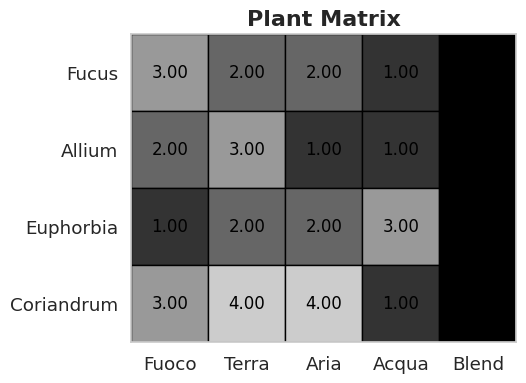

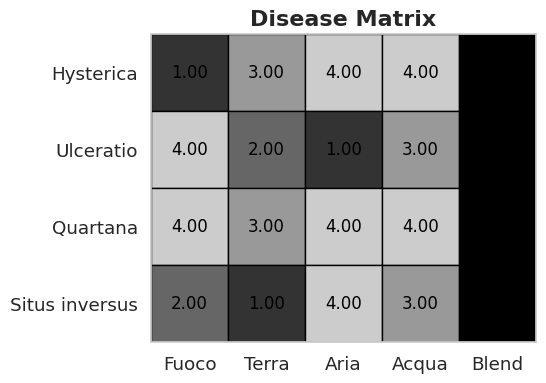

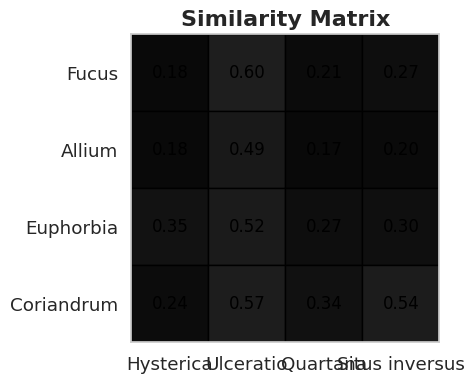

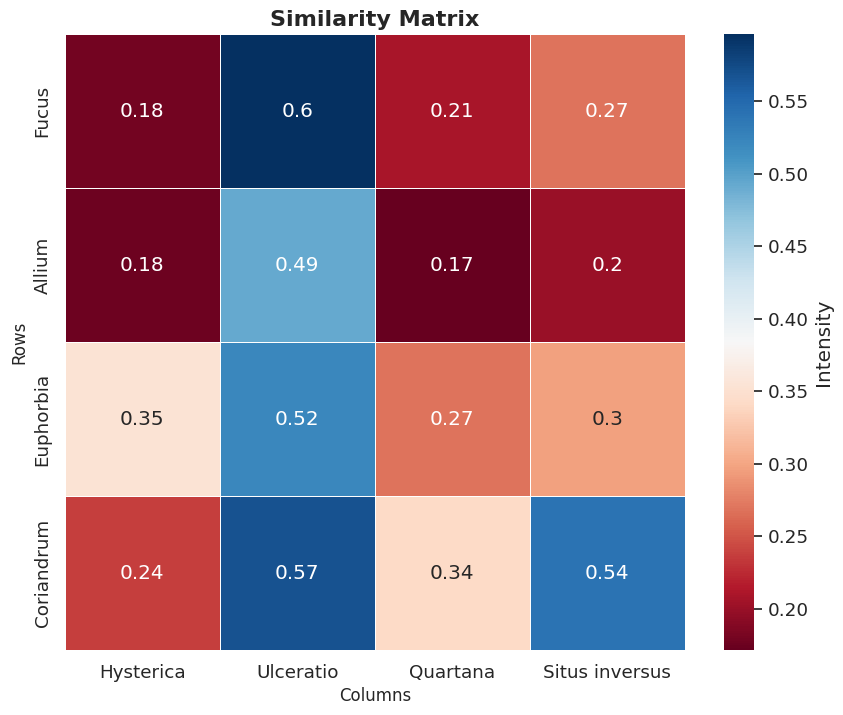

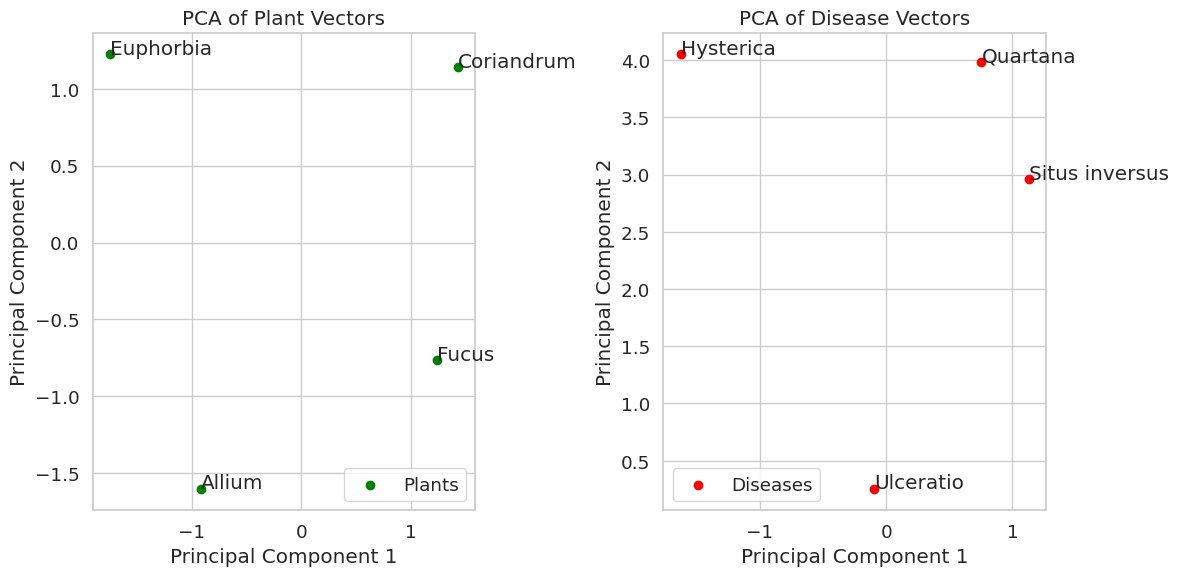

In [58]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns


# Function to display a matrix with colors
def visualizza_matrice_con_colori(matrice, titolo):

    # Clear any previous plots to avoid duplication
    plt.clf()
    plt.close()

    # Ensure the matrix contains numeric values
    matrice = matrice.apply(pd.to_numeric, errors='coerce').fillna(0)

    num_righe = matrice.shape[0]
    num_colonne = matrice.shape[1]

    fig, ax = plt.subplots(figsize=(num_colonne + 1, num_righe))
    ax.set_aspect("equal")

    for i in range(num_righe):
        for j in range(num_colonne):
            intensita = matrice.iloc[i, j] / 4
            try:
                # Attempt to get the color associated with the label
                colore_elemento = colori_elementi.get(display_labels.get(matrice.columns[j], ""), "#CCCCCC")
            except (ValueError, KeyError):
                # If there's an error in mapping, use a default color
                colore_elemento = "#CCCCCC"  # Light gray as a fallback color

            # Convert the color to RGB and adjust intensity
            colore_rgb = mcolors.to_rgb(colore_elemento)
            colore_finale = tuple(c * intensita for c in colore_rgb)

            # Add rectangle with the computed color
            rect = plt.Rectangle((j, num_righe - 1 - i), 1, 1, facecolor=colore_finale, edgecolor='black')
            ax.add_patch(rect)

            # Add text for the matrix value
            ax.text(j + 0.5, num_righe - 1 - i + 0.5, f"{matrice.iloc[i, j]:.2f}",
                    ha='center', va='center', color='black', fontsize=12)

    ax.set_xlim(0, num_colonne)
    ax.set_ylim(0, num_righe)
    ax.set_xticks(np.arange(num_colonne) + 0.5)
    ax.set_yticks(np.arange(num_righe) + 0.5)
    ax.set_xticklabels(matrice.columns)
    ax.set_yticklabels(matrice.index[::-1])
    ax.set_title(titolo, fontsize=16, fontweight='bold')

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrice, annot=True, cmap="RdBu", linewidths=0.5, cbar_kws={"label": "Intensity"})
    plt.title(titolo, fontsize=16, fontweight='bold')
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Rows', fontsize=12)
    #plt.show()


# Widget Setup
sign_dropdown = widgets.Dropdown(options=signs.keys(), description='Sign:', value=list(signs.keys())[0])
disease_dropdown = widgets.Dropdown(options=malattie, description='Disease:', value=malattie[0])
season_dropdown = widgets.Dropdown(options=['Spring', 'Summer', 'Autumn', 'Winter'], description='Season:')
plant_dropdown = widgets.Dropdown(options=piante, description='Plant:', value=piante[0])

# Sliders for adjustable effects
plant_effect_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Plant Effect')
disease_effect_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Disease Effect')

# Buttons for actions
randomize_button = widgets.Button(description='Randomize All')
find_best_button = widgets.Button(description='Find Best Plant')

# Output for displaying the radar charts and visualizations
output = widgets.Output()

# Function to update radar charts based on selections
def update_visualizations(change=None):
    with output:
        clear_output()
        # Get current selections
        selected_sign = sign_dropdown.value
        selected_disease = disease_dropdown.value
        selected_season = season_dropdown.value
        selected_plant = plant_dropdown.value

        # Update radar charts
        matrice_corpo = crea_matrice_corpo(signs[selected_sign]["humor"])
        adjusted_matrice_corpo = adjust_body_matrix_for_season(matrice_corpo, selected_season)
        matrice_malattia = matrice_malattie.loc[[selected_disease]]
        matrice_piante_selezionata = matrice_piante.loc[[selected_plant]]

        # Update radar charts for different states
        create_radar_chart(crea_vettore_unico(adjusted_matrice_corpo) + crea_vettore_unico(adjusted_matrice_corpo)[:1],
                           f"Healthy Body ({selected_sign}, {selected_season})")
        create_radar_chart(crea_vettore_unico(matrice_malattia) + crea_vettore_unico(matrice_malattia)[:1],
                           f"Disease ({selected_disease})")
        create_radar_chart(crea_vettore_unico(matrice_piante_selezionata) + crea_vettore_unico(matrice_piante_selezionata)[:1],
                           f"Plant ({selected_plant})")
        diseased_body_vector = contrai_malattia_vettoriale(adjusted_matrice_corpo, matrice_malattia, disease_effect=disease_effect_slider.value)
        create_radar_chart(diseased_body_vector + diseased_body_vector[:1], f"Diseased Body ({selected_disease})")
        cured_body_vector = stampa_corpo_curato(adjusted_matrice_corpo, matrice_malattia, [selected_plant], matrice_piante, plant_effect_slider.value)
        create_radar_chart(cured_body_vector + cured_body_vector[:1], f"Cured Body")

        # Display matrices
        print("Plant Matrix:")
        display(visualizza_matrice_con_colori(matrice_piante, "Plant Matrix"))
        print("Disease Matrix:")
        display(visualizza_matrice_con_colori(matrice_malattie, "Disease Matrix"))
        print("Similarity Matrix:")
        similarity_matrix = similarita_coseno_invertita_modificata_pca(matrice_piante, matrice_malattie)
        df_similarita = pd.DataFrame(similarity_matrix, index=piante, columns=malattie)
        display(visualizza_matrice_con_colori(df_similarita, "Similarity Matrix"))

# Function to randomize all selections
def randomize_selections(change):
    sign_dropdown.value = random.choice(list(signs.keys()))
    disease_dropdown.value = random.choice(list(malattie))
    season_dropdown.value = random.choice(['Spring', 'Summer', 'Autumn', 'Winter'])
    plant_dropdown.value = random.choice(list(piante))

# Function to find the best plant for the selected disease and update the radar chart
def find_best_plant(change):
    with output:
        clear_output()

        # Get selected values
        selected_sign = sign_dropdown.value
        selected_disease = disease_dropdown.value
        selected_season = season_dropdown.value
        disease_effect = disease_effect_slider.value

        # Validate selections
        if selected_sign is None or selected_disease is None or selected_season is None:
            print("Please select valid options for sign, disease, and season.")
            return

        humor = signs[selected_sign]["humor"]

        # Create and adjust the body matrix
        matrice_corpo = crea_matrice_corpo(humor)
        adjusted_matrice_corpo = adjust_body_matrix_for_season(matrice_corpo, selected_season)

        # Check if the selected disease is available
        if selected_disease not in matrice_malattie.index:
            print(f"The selected disease '{selected_disease}' is not available in the matrix.")
            return

        matrice_malattia = matrice_malattie.loc[[selected_disease]]

        # Recalculate the similarity matrix
        similarity_matrix = similarita_coseno_invertita_modificata_pca(matrice_piante, matrice_malattie)
        df_similarita = pd.DataFrame(similarity_matrix, index=piante, columns=malattie)

        # Find the best plant for the selected disease
        best_plant, best_effect, _ = trova_pianta_migliore_equilibrio(adjusted_matrice_corpo, matrice_malattia, matrice_piante, df_similarita)

        # Display the radar charts for different states, including the best plant
        create_radar_chart(crea_vettore_unico(adjusted_matrice_corpo) + crea_vettore_unico(adjusted_matrice_corpo)[:1],
                           f"Healthy Body ({selected_sign}, {selected_season})")
        create_radar_chart(crea_vettore_unico(matrice_malattia) + crea_vettore_unico(matrice_malattia)[:1],
                           f"Disease ({selected_disease})")
        create_radar_chart(crea_vettore_unico(matrice_piante.loc[[best_plant]]) + crea_vettore_unico(matrice_piante.loc[[best_plant]])[:1],
                           f"Best Plant: {best_plant} - {best_effect * 100:.0f}% Used")

        # Simulate the diseased body vector
        diseased_body_vector = contrai_malattia_vettoriale(adjusted_matrice_corpo, matrice_malattia, disease_effect=disease_effect)
        create_radar_chart(diseased_body_vector + diseased_body_vector[:1],
                           f"Diseased Body ({selected_disease})")

        # Calculate the cured body vector using the best plant effect
        cured_body_vector = stampa_corpo_curato(adjusted_matrice_corpo, matrice_malattia, [best_plant], matrice_piante, best_effect)
        create_radar_chart(cured_body_vector + cured_body_vector[:1],
                           f"Cured Body - {best_plant} ({best_effect * 100:.0f}%)")

# Link actions to buttons
randomize_button.on_click(randomize_selections)
find_best_button.on_click(find_best_plant)
sign_dropdown.observe(update_visualizations, names='value')
disease_dropdown.observe(update_visualizations, names='value')
season_dropdown.observe(update_visualizations, names='value')
plant_dropdown.observe(update_visualizations, names='value')
plant_effect_slider.observe(update_visualizations, names='value')
disease_effect_slider.observe(update_visualizations, names='value')

# Display interface
display(sign_dropdown, disease_dropdown, season_dropdown, plant_dropdown,
        plant_effect_slider, disease_effect_slider,
        randomize_button, find_best_button, output)

# Initial update to display the visualizations
update_visualizations()

# Function to visualize PCA results in two Cartesian graphs
def visualize_pca():
        # Step 1: Prepare the data for PCA
        # Assuming vettori_piante and vettori_malattie are the original feature vectors
        scaler = StandardScaler()
        vettori_piante_scaled = scaler.fit_transform(vettori_piante)
        vettori_malattie_scaled = scaler.transform(vettori_malattie)

        # Step 2: Apply PCA
        pca = PCA(n_components=2)  # Reduce to 2 principal components
        vettori_piante_pca = pca.fit_transform(vettori_piante_scaled)
        vettori_malattie_pca = pca.transform(vettori_malattie_scaled)

        # Step 3: Plot PCA results for plants
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)  # First subplot for plants
        plt.scatter(vettori_piante_pca[:, 0], vettori_piante_pca[:, 1], color='green', label='Plants')
        plt.title('PCA of Plant Vectors')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()

        # Add labels for plants
        for i, txt in enumerate(piante):
            plt.annotate(txt, (vettori_piante_pca[i, 0], vettori_piante_pca[i, 1]))

        # Step 4: Plot PCA results for diseases
        plt.subplot(1, 2, 2)  # Second subplot for diseases
        plt.scatter(vettori_malattie_pca[:, 0], vettori_malattie_pca[:, 1], color='red', label='Diseases')
        plt.title('PCA of Disease Vectors')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()

        # Add labels for diseases
        for i, txt in enumerate(malattie):
            plt.annotate(txt, (vettori_malattie_pca[i, 0], vettori_malattie_pca[i, 1]))

        # Show the plots
        plt.tight_layout()
        plt.show()

visualize_pca()


